In [1]:
import datetime
import pandas as pd
from utils import SSHClient

In [2]:
node_id = '001e0610f05c'
client = SSHClient('node50212')

In [3]:
date = datetime.datetime.fromtimestamp(int(client.check_output('date +%s')))
print(date)

2018-04-09 13:58:29


## Device List

In [50]:
nc_lsusb = client.check_output('lsusb').decode()
print(nc_lsusb)

ep_lsusb = client.check_output('/usr/lib/waggle/nodecontroller/scripts/eplogin lsusb').decode()
print(ep_lsusb)

Bus 001 Device 006: ID 1bc7:0021 Telit Wireless Solutions HE910
Bus 001 Device 013: ID 2341:003e Arduino SA 
Bus 001 Device 003: ID 2341:8037 Arduino SA 
Bus 001 Device 002: ID 05e3:0610 Genesys Logic, Inc. 4-port hub
Bus 001 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub
Bus 002 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub

Bus 006 Device 002: ID 0bda:8153 Realtek Semiconductor Corp. 
Bus 006 Device 001: ID 1d6b:0003 Linux Foundation 3.0 root hub
Bus 005 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub
Bus 004 Device 002: ID 05e3:0616 Genesys Logic, Inc. hub
Bus 004 Device 001: ID 1d6b:0003 Linux Foundation 3.0 root hub
Bus 003 Device 003: ID 0d8c:013c C-Media Electronics, Inc. CM108 Audio Controller
Bus 003 Device 002: ID 05e3:0610 Genesys Logic, Inc. 4-port hub
Bus 003 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub
Bus 002 Device 001: ID 1d6b:0001 Linux Foundation 1.1 root hub
Bus 001 Device 002: ID 05a3:8830 ARC International 
Bus 001 Device 001: ID 

In [56]:
nc_devices = client.check_output('ls /dev | grep waggle').decode().split()
print(nc_devices)

ep_devices = client.check_output("/usr/lib/waggle/nodecontroller/scripts/eplogin 'ls /dev' | grep waggle").decode().split()
print(ep_devices)

['waggle_coresense', 'waggle_sysmon']
['waggle_cam_top', 'waggle_microphone']


## Uptime

In [42]:
nc_uptime = client.check_output('uptime').decode()
print(nc_uptime)

ep_uptime = client.check_output('/usr/lib/waggle/nodecontroller/scripts/eplogin uptime').decode()
print(ep_uptime)

wm_uptime = datetime.timedelta(seconds=int(client.check_output('wagman-client up').decode()))
print(wm_uptime)

 19:21:32 up 4 days,  1:09,  0 users,  load average: 0.50, 0.39, 0.40

 19:21:31 up 4 days,  1:08,  0 users,  load average: 1.69, 1.65, 1.62

4 days, 1:09:40


## Service Status

In [45]:
print(client.check_output('systemctl status rabbitmq-server').decode())
print(client.check_output('systemctl status waggle-plugin-coresense').decode())
print(client.check_output('systemctl status waggle-wagman-driver -n25').decode())

● rabbitmq-server.service - RabbitMQ broker
   Loaded: loaded (/etc/systemd/system/rabbitmq-server.service; enabled; vendor preset: enabled)
   Active: active (running) since Mon 2018-04-09 15:35:52 UTC; 3h 48min ago
 Main PID: 13218 (beam.smp)
   Status: "Initialized"
   CGroup: /system.slice/rabbitmq-server.service
           ├─13218 /usr/lib/erlang/erts-7.3/bin/beam.smp -W w -A 64 -P 1048576 -t 5000000 -stbt db -zdbbl 128000 -K true -- -root /usr/lib/erlang -progname erl -- -home /var/lib/rabbitmq -- -pa /usr/lib/rabbitmq/lib/rabbitmq_server-3.6.12/ebin -noshell -noinput -s rabbit boot -sname rabbit@001e0610f05cMMC -boot start_sasl -config /etc/rabbitmq/rabbitmq -kernel inet_default_connect_options [{nodelay,true}] -sasl errlog_type error -sasl sasl_error_logger false -rabbit error_logger {file,"/var/log/rabbitmq/rabbit@001e0610f05cMMC.log"} -rabbit sasl_error_logger {file,"/var/log/rabbitmq/rabbit@001e0610f05cMMC-sasl.log"} -rabbit enabled_plugins_file "/etc/rabbitmq/enabled_plugin

## Fail Counts

In [25]:
fails = list(map(int, client.check_output('wagman-client fc').decode().split()))
print(fails)

[7, 1, 1, 0, 0]


## Current Usage

In [9]:
cu = list(map(int, client.check_output('wagman-client cu').decode().split()))
print(cu)

[192, 208, 304, 144, 112, 128]


## Heartbeats

In [10]:
hb = list(map(int, client.check_output('wagman-client hb').decode().split()))
print(hb)

[2261, 4538, 3195, 348402346, 348402347]


## Repo Versions

In [11]:
print(client.check_output('cd /usr/lib/waggle/core; git log -n1 --tags').decode())
print(client.check_output('cd /usr/lib/waggle/nodecontroller; git log -n1 --tags').decode())
print(client.check_output('cd /usr/lib/waggle/plugin_manager; git log -n1 --tags').decode())

commit 0a93cc2ce33b2a66f0931f49cf00bf44d87046c6
Author: Yongho Kim <ironyonghokim@gmail.com>
Date:   Thu Dec 14 11:22:20 2017 -0600

    Removed 'v' for PyWaggle version

commit c438207e58dbb31ac2d684f324ec57ff9f9f65dd
Author: Yongho Kim <ironyonghokim@gmail.com>
Date:   Thu Dec 7 15:21:51 2017 -0600

    Changed path of pidfile

commit 3aa8f95773cf1799a650608c1f3a0b7183c408fd
Author: Yongho Kim <ironyonghokim@gmail.com>
Date:   Thu Mar 15 10:40:19 2018 -0500

    Sending and printing MAC and firware version at the beginning



## Rcent Data Count

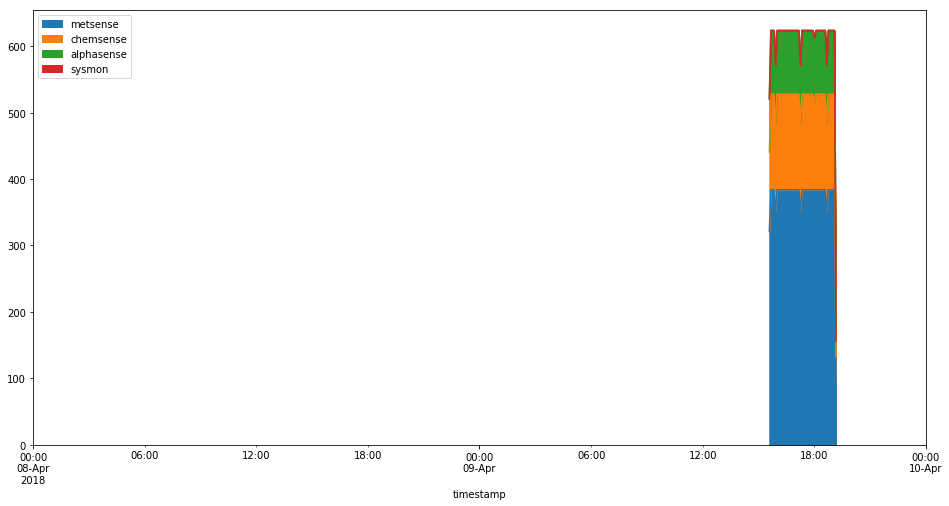

In [38]:
def read_data_csv(node_id, date):
    url = 'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/{}/{}.csv.gz'.format(node_id, date)
    column_names = ['node_id', 'timestamp', 'plugin', 'topic', 'sensor', 'param', 'value']
    return pd.read_csv(url, sep=';', names=column_names, parse_dates=['timestamp'])


def read_data_csvs(node_id, dates):
    dfs = []
    
    for date in dates:
        try:
            dfs.append(read_data_csv(node_id, date))
        except Exception:
            continue
    
    return pd.concat(dfs)


tomorrow = datetime.date.today() + datetime.timedelta(days=1)
dates = pd.date_range(end=tomorrow, periods=3).date

df = read_data_csvs(node_id, dates)

df['alphasense'] = df['sensor'].str.startswith('Alphasense')
df['chemsense'] = df['sensor'].str.startswith('Chemsense')
df['sysmon'] = df['plugin'] == 'sysmon:1'
df['metsense'] = -df['chemsense'] & -df['alphasense'] & -df['sysmon']

counts = df[['timestamp', 'metsense', 'chemsense', 'alphasense', 'sysmon']].groupby('timestamp').sum().resample('5min').sum()
counts.plot.area(figsize=(16, 8), xlim=(dates.min(), dates.max()))